# Assignment 2 - Supervised Machine Learning Fundamentals

## *Fides Schwartz*
Netid: fs113

Total points in the assignment add up to 90; an additional 10 points are allocated to presentation quality.

## Learning Objectives:
By successfully completing this assignment you will be able to...
- Explain the bias-variance tradeoff of supervised machine learning and the impact of model flexibility on algorithm performance
- Perform supervised machine learning training and performance evaluation
- Implement a k-nearest neighbors machine learning algorithm from scratch in a style similar to that of popular machine learning tools like `scikit-learn`
- Describe how KNN classification works, the method's reliance on distance measurements, and the impact of higher dimensionality on computational speed
- Apply regression (linear regression) and classification (KNN) supervised learning techniques to data and evaluate the performance of those methods
- Construct simple feature transformations for improving model fit in linear models
- Fit a `scikit-learn` supervised learning technique to training data and make predictions using it

# Conceptual Questions on Supervised Learning

## Question 1
**[4 points]**
For each part below, indicate whether we would generally expect the performance of a flexible statistical learning method to be *better* or *worse* than an inflexible method. Justify your answer.

1. The sample size $n$ is extremely large, and the number of predictors $p$ is small.
2. The number of predictors $p$ is extremely large, and the number of observations $n$ is small.
3. The relationship between the predictors and response is highly non-linear.
4. The variance of the error terms, i.e. $\sigma^2 = Var(\epsilon)$, is extremely high

**ANSWER 1**
1. If the sample size $n$ is extremely large, and the number of predictors $p$ is small, using a flexible statistical learning method would be better than an inflexible method.
This is, because overfitting would not be a concern with a large dataset and few predictors and thus a flexible method would give us the benefit of lower bias.

2. If the number of predictors $p$ is extremely large, and the number of observations $n$ is small, an inflexible statistical learning method would be better than a flexible method.
This is, because overfitting would be of great concern in this scenario and it would increase the variance to a greater extend than an inflexible method.

3. If the relationship between the predictors and response is highly non-linear, a flexible statistical learning method would be better than an inflexible method.
This is, because inflexible methods like linear regression make a very strong assumption about the shape of the function, which would most likely lead to a bad fit in this scenario.

4. If the variance of the error terms, i.e. $\sigma^2 = Var(\epsilon)$, is extremely high, an inflexible statistical method would be better than a flexible method.
This is, because flexible methods will fit too much of the noise and lead to larger test error.

## Question 2
**[6 points]** For each of the following, (i) explain if each scenario is a classification or regression problem AND why, (ii) indicate whether we are most interested in inference or prediction for that problem AND why, and (iii) provide the sample size $n$ and number of predictors $p$ indicated for each scenario.

**(a)** We collect a set of data on the top 500 firms in the US. For each firm we record profit, number of employees, industry and the CEO salary. We are interested in understanding which factors affect CEO salary.

**(b)** We are considering launching a new product and wish to know whether it will be a success or a failure. We collect data on 20 similar products that were previously launched. For each product we have recorded whether it was a success or failure, price charged for the product, marketing budget, competition price, and ten other variables.

**(c)** We are interesting in predicting the % change in the US dollar in relation to the weekly changes in the world stock markets. Hence we collect weekly data for all of 2012. For each week we record the % change in the dollar, the % change in the US market, the % change in the British market, and the % change in the German market.

**ANSWER 2**

**(a)** We collect a set of data on the top 500 firms in the US. For each firm we record profit, number of employees, industry and the CEO salary. We are interested in understanding which factors affect CEO salary.

(i) This is a regression problem, since we are trying to predict one continuous value using several predictors; linear regressin would be well suited to explore this.

(ii) We are most interested in inference in this case. We are trying to tease out influencing factors of CEO salary, not trying to predict the salary of a hypothetical CEO in some firm with a certain profit, number of employees and in a specific industry.

(iii) Sample size $n$ = 500 (firms) and number of predictors $p$ = 3 (profit, no. employees, industry).

**(b)** We are considering launching a new product and wish to know whether it will be a success or a failure. We collect data on 20 similar products that were previously launched. For each product we have recorded whether it was a success or failure, price charged for the product, marketing budget, competition price, and ten other variables.

(i) This is a classification problem, as we are looking at the binary: success (1) vs failure (0).

(ii) This is a prediction problem as we will base a product launch decision on the outcome of this experiment. We are not primarily interested in the factors that influence success or failure.

(iii) Sample size $n$ = 20 (products) and number of predictors $p$ = 13.

**(c)** We are interested in predicting the % change in the US dollar in relation to the weekly changes in the world stock markets. Hence we collect weekly data for all of 2012. For each week we record the % change in the dollar, the % change in the US market, the % change in the British market, and the % change in the German market.

(i) This is a regression problem, since we are trying to predict quantitative changes US dollar in relation to stock markets. This cannot be classified into categories.

(ii) This is a prediction problem, since we are trying to predict the quantitative changes in US dollar, not trying to infer which parameters influence these changes.

(iii) Sample size $n$ = 52 (weeks in 2012), and number of predictors $p$ = 3 (stock markets, US, Britain, Germany).

# Practical Questions

## Question 3


**[6 points] Classification using KNN**. The table below provides a training dataset containing six observations (a.k.a. samples) ($n=6$) each with three predictors (a.k.a. features) ($p=3$), and one qualitative response variable (a.k.a. target).

*Table 1. Training dataset with $n=6$ observations in $p=3$ dimensions with a categorical response, $y$*

| Obs. | $x_1$ | $x_2$ | $x_3$ | $y$   |
|------|-------|-------|-------|-------|
| **1**| 0     | 3     | 0     | Red   |
| **2**| 2     | 0     | 0     | Red   |
| **3**| 0     | 1     | 3     | Red   |
| **4**| 0     | 1     | 2     | Blue  |
| **5**| -1    | 0     | 1     | Blue  |
| **6**| 1     | 1     | 1     | Red   |

We want to use the above training dataset to make a prediction, $\hat{y}$, for an unlabeled test data observation where $x_1=x_2=x_3=0$ using $K$-nearest neighbors. You are given some code below to get you started. *Note: coding is only required for part (a), for (b)-(d) please provide your reasoning based on your answer to part (a)*.

**(a)** Compute the Euclidean distance between each observation and the test point, $x_1=x_2=x_3=0$. Present your answer in a table similar in style to Table 1 with observations 1-6 as the row headers.

**(b)** What is our prediction, $\hat{y}$, when $K=1$ for the test point? Why?

**(c)** What is our prediction, $\hat{y}$, when $K=3$ for the test point? Why?

**(d)** If the Bayes decision boundary (the optimal decision boundary) in this problem is highly nonlinear, then would we expect the *best* value of $K$ to be large or small? Why?

**ANSWER 3**

In [4]:
import numpy as np

# Make numpy array of starting points
X = np.array([[ 0, 3, 0],
              [ 2, 0, 0],
              [ 0, 1, 3],
              [ 0, 1, 2],
              [-1, 0, 1],
              [ 1, 1, 1]])
y = np.array(['r','r','r','b','b','r'])
#print(X)

In [5]:
# calculating Euclidean distance
# using linalg.norm()
dist1 = np.linalg.norm(X[0, :] - 0)
#print(dist1)
dist2 = np.linalg.norm(X[1, :] - 0)
#print(dist2)
dist3 = np.linalg.norm(X[2, :] - 0)
#print(dist3)
dist4 = np.linalg.norm(X[3, :] - 0)
#print(dist4)
dist5 = np.linalg.norm(X[4, :] - 0)
#print(dist5)
dist6 = np.linalg.norm(X[5, :] - 0)
#print(dist6)

**(a)**
*Table 1. Eucledian distances in dataset with $n=6$ observations in $p=3$ dimensions with a categorical response, $y$*
| Observation   | $Eucledian-distance$   | 
|------         |-------                 |
| **1**         | 3.0                    | 
| **2**         | 2.0                    | 
| **3**         | 3.16                   | 
| **4**         | 2.24                   | 
| **5**         | 1.41                   | 
| **6**         | 1.73                   | 

**(b)** What is our prediction, $\hat{y}$, when $K=1$ for the test point? Why?
The nearest neighbor to test point (0, 0, 0) is observation 5 (-1, 0, 1) with euclidean distance ~1.41. Since observation 5 was green, we predict (K = 1) that the test point will also be green.

**(c)** What is our prediction, $\hat{y}$, when $K=3$ for the test point? Why?
The nearest three neighbors to test point (0, 0, 0) are observation 5, 6 (with distance ~1.73), and 2 (with distance 2). Since observation 5 was green, observation 6 was red, and observation 2 was red, we predict (K = 3) the test point will be the majority --> red.

**(d)** If the Bayes decision boundary (the optimal decision boundary) in this problem is highly nonlinear, then would we expect the *best* value of $K$ to be large or small? Why?
A highly nonlinear Bayes boundary would suggest that there is less advantage to generalizing further due to high variance, so the best value for K would be small.

## Question 4
**[18 points] Build your own classification algorithm**.

**(a)** Build a working version of a binary KNN classifier using the skeleton code below. We'll use the `sklearn` convention that a supervised learning algorithm has the methods `fit` which trains your algorithm (for KNN that means storing the data) and `predict` which identifies the K nearest neighbors and determines the most common class among those K neighbors. *Note: Most classification algorithms typically also have a method `predict_proba` which outputs the confidence score of each prediction, but we will explore that in a later assignment.*

**(b)** Load the datasets to be evaluated here. Each includes training features ($\mathbf{X}$), and test features ($\mathbf{y}$) for both a low dimensional dataset ($p = 2$ features/predictors) and a higher dimensional dataset ($p = 100$ features/predictors). For each of these datasets there are $n=1000$ observations of each. They can be found in the `data` subfolder in the `assignments` folder on github. Each file is labeled similar to `A2_X_train_low.csv`, which lets you know whether the dataset is of features, $X$, targets, $y$; training or testing; and low or high dimensions.

**(c)** Train your classifier on first the low dimensional dataset and then the high dimensional dataset with $k=5$. Evaluate the classification performance on the corresponding test data for each of those trained models. Calculate the time it takes each model to make the predictions and the overall accuracy of those predictions for each corresponding set of test data - state each.

**(d)** Compare your implementation's accuracy and computation time to the scikit learn [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) class. How do the results and speed compare to your implementation?

**(e)** Some supervised learning algorithms are more computationally intensive during training than testing. What are the drawbacks of the prediction process being slow? In what cases in practice might slow testing (inference) be more problematic than slow training?

**ANSWER 4**

### Part (a) -  Build a working version of a binary KNN classifier

In [6]:
# import needed kits
import pandas as pd
import numpy as np
import scipy as sp
import scipy.spatial
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from collections import Counter

In [7]:
# Write KNN classifier
class KNN:
    # k-Nearest Neighbor class object for classification training and testing
    def __init__(self, k):
        self.Xtrain = []
        self.Ytrain = []
        self.k = k

    # Save the training data to properties of this class
    def fit(self, x, y):
        self.Xtrain = x
        self.Ytrain = y

    # Calculate distances between datapoint and all other points in dataset
    def predict(self, x):
        y_hat = []  # Variable to store the estimated class label for/final output

        for test_point in range(len(x)): # Calculate distance between each point and all points in dataset
            coll_distance = [] # Make empty list to collect distances
            for train_point in range(len(self.Xtrain)): # Iterate over list and store each distance in list
                dist_eucl = scipy.spatial.distance.euclidean(self.Xtrain.iloc[train_point], x.iloc[test_point])
                coll_distance.append([dist_eucl, train_point]) # Add distances to collection list each time

            votes = [] # Make empty list for closest neighbours

            coll_distance.sort() # Sort by shortest distance to datapoint to find closest neighbours
            distance1 = coll_distance[0 : self.k] # Grad the k closest neighbours

            for _, train_point in distance1: # Put them into one of the categories
                vote = self.Ytrain.iloc[train_point,0]
                votes.append(vote) # Append result to votes list
            ans = Counter(votes).most_common(1)[0][0] # Keep track of which category gets voted for how often
            y_hat.append(ans) # Append the answer to the final output
                    
        return y_hat  # Return the estimated targets

### Part (b) - Load the datasets to be evaluated here

In [8]:
# Load x datasets
X_train_low = pd.read_csv(
    "C:\\Users\\dm93\\Documents\\GitHub\\ids705\\assignments\\data\\A2_X_train_low.csv", header = None
)
X_train_high = pd.read_csv(
    "C:\\Users\\dm93\\Documents\\GitHub\\ids705\\assignments\\data\\A2_X_train_high.csv", header = None
)
X_test_low = pd.read_csv(
    "C:\\Users\\dm93\\Documents\\GitHub\\ids705\\assignments\\data\\A2_X_test_low.csv", header = None
)
X_test_high = pd.read_csv(
    "C:\\Users\\dm93\\Documents\\GitHub\\ids705\\assignments\\data\\A2_X_test_high.csv", header = None
)
#X_test_low.head()


In [9]:
print(type(X_test_low))
print(type(X_test_high))
print(type(X_train_low))
print(type(X_train_high))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [10]:
# Load y datasets
y_train_low = pd.read_csv(
    "C:\\Users\\dm93\\Documents\\GitHub\\ids705\\assignments\\data\\A2_y_train_low.csv", header = None
)
y_train_high = pd.read_csv(
    "C:\\Users\\dm93\\Documents\\GitHub\\ids705\\assignments\\data\\A2_y_train_high.csv", header = None
)
y_test_low = pd.read_csv(
    "C:\\Users\\dm93\\Documents\\GitHub\\ids705\\assignments\\data\\A2_y_test_low.csv", header = None
)
y_test_high = pd.read_csv(
    "C:\\Users\\dm93\\Documents\\GitHub\\ids705\\assignments\\data\\A2_y_test_high.csv", header = None
)
# y_train_low.head()


In [11]:
print(type(y_test_low))
print(type(y_test_high))
print(type(y_train_low))
print(type(y_train_high))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [12]:
y_test_low = y_test_low.astype(int)
y_train_low = y_train_low.astype(int)
y_test_HiGh = y_test_high.astype(int)
y_train_high = y_train_high.astype(int)

### Part (c) - Train your classifier on first the low dimensional dataset and then the high dimensional dataset

In [13]:
classification_low = KNN(5)
classification_low.fit(X_train_low, y_train_low) # train on low dimensional dataset

classification_high = KNN(5)
classification_high.fit(X_train_high, y_train_high) # train on high dimensional dataset


In [14]:
# Evaluate the classification performance on the corresponding test data for each of those trained models.
prediction_low = classification_low.predict(X_test_low)
for i in range(len(prediction_low)):
   print(prediction_low[i], end= ' ')

0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [15]:
prediction_high = classification_high.predict(X_test_high)
for i in prediction_high:
    print(i, end= ' ')

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [16]:
from sklearn import metrics

acc_low = metrics.accuracy_score(prediction_low, list(y_test_low.iloc[:,0]))


In [17]:
from sklearn import metrics

acc_high = metrics.accuracy_score(prediction_high, list(y_test_low.iloc[:,0]))

In [19]:
import time
t = time.time()
scores = classification_low.predict(X_test_low)
elapsed_time_low = time.time()-t

In [20]:
t = time.time()
scores = classification_high.predict(X_test_high)
elapsed_time_high = time.time()-t

In [21]:
print(f"The time it takes to make predictions for the low dataset is {elapsed_time_low} sec and for the high dataset it is {elapsed_time_high} sec.")

The time it takes to make predictions for the low dataset is 127.24509310722351 sec and for the high dataset it is 131.38540053367615 sec.


In [22]:
print(f"The overall accuracy for the low dataset is {acc_low} and the overall accuracy for the high dataset is {acc_high}")


The overall accuracy for the low dataset is 0.925 and the overall accuracy for the high dataset is 0.993


### Part (d) - Compare your implementation's accuracy and computation time to the scikit learn

In [23]:
import sklearn

# Implement KNN using sklearn for low dataset
knn_low = KNeighborsClassifier(n_neighbors=5)
 
knn_low.fit(X_train_low, y_train_low)
 
# Calculate the accuracy of the model
acc_sk_low = knn_low.score(X_test_low, y_test_low)

print(f"The accuracy of the sklearn KNN for the low dataset is: {acc_sk_low}.")

The accuracy of the sklearn KNN for the low dataset is: 0.925.


C:\Users\dm93\miniconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [24]:
# Implement KNN using sklearn for high dataset
knn_high = KNeighborsClassifier(n_neighbors=5)
 
knn_high.fit(X_train_high, y_train_high)
 
# Calculate the accuracy of the model
acc_sk_high = knn_high.score(X_test_high, y_test_high)

print(f"The accuracy of the sklearn KNN for the high dataset is: {acc_sk_high}.")

The accuracy of the sklearn KNN for the high dataset is: 0.993.


C:\Users\dm93\miniconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [25]:
t = time.time()
scores = knn_low.predict(X_test_low)
elapsed_time_low_sk = time.time() - t

print(
    f"The time it takes for the sklearn KNN to compute predictions for the low dataset is: {elapsed_time_low_sk} sec."
)

The time it takes for the sklearn KNN to compute predictions for the low dataset is: 0.03493189811706543 sec.


In [26]:
t2 = time.time()
scores = knn_high.predict(X_test_high)
elapsed_time_high_sk = time.time() - t2

print(
    f"The time it takes for the sklearn KNN to compute predictions for the high dataset is: {elapsed_time_high_sk} sec."
)


The time it takes for the sklearn KNN to compute predictions for the high dataset is: 0.06482529640197754 sec.


### Part (e) - What are the drawbacks of the prediction process being slow? In what cases in practice might slow testing (inference) be more problematic than slow training?

(i) The drawbacks of the prediction process being slow, are that this method could not be used where decisions based on the predictions would need to be made fast (e.g. self driving car needing to decide wheter to speed up or break when someone tries to merge). This example shows very clearly that the KNN from scratch takes a much longer time than the sklearn-based KNN.

(ii) Slow testing would be more problematic than slow training, if we want to preserve the accuracy of the inferences made. Though in this example, it seems like prediction accuracy does not suffer from using sklearn over the from-scratch method. Not knowing the exact workings of the sklearn method, I would guess the increased speed is due to avoiding the for-loops that I implemented in the KNN.

## Question 5
**[20 points] Bias-variance tradeoff: exploring the tradeoff with a KNN classifier**. This exercise will illustrate the impact of the bias-variance tradeoff on classifier performance by investigating how model flexibility impacts classifier decision boundaries. For this problem, please us Scikit-learn's KNN implementation rather than your own implementation, as you did at the end of the last question.

**(a)** Create a synthetic dataset (with both features and targets). Use the [`make_moons`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons) module with the parameter `noise=0.35` to generate 1000 random samples.

**(b)** Visualize your data: scatterplot your random samples with each class in a different color.

**(c)** Create 3 different data subsets by selecting 100 of the 1000 data points at random three times (with replacement). For each of these 100-sample datasets, fit three separate k-Nearest Neighbor classifiers with: $k = \{1, 25, 50\}$. This will result in 9 combinations (3 datasets, each with 3 trained classifiers).

**(d)** For each combination of dataset and trained classifier plot the decision boundary (similar in style to Figure 2.15 from *Introduction to Statistical Learning*). This should form a 3-by-3 grid. Each column should represent a different value of $k$ and each row should represent a different dataset. 

**(e)** What do you notice about the difference between the rows and the columns. Which decision boundaries appear to best separate the two classes of data? Which decision boundaries vary the most as the data change?

**(f)** Explain the bias-variance tradeoff using the example of the plots you made in this exercise and its implications for training supervised machine learning algorithms.

Notes and tips for plotting decision boundaries (as in part d):
- *Resource for plotting decision boundaries with meshgrid and contour: https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html*
- If you would like to change the colors of the background, and do not like any of the existing cmap available in matplotlib, you can make your own cmap using the 2 sets of rgb values. Sample code (replace r, g, b with respective rgb values):

**ANSWER 5**

### Part (a) - Create a synthetic dataset (with both features and targets)

In [27]:
from sklearn import datasets

X,y = sklearn.datasets.make_moons(
    n_samples=1000, shuffle=True, noise=0.35, random_state=None
)


### Part (b) - Visualize your data: scatterplot your random samples with each class in a different color.

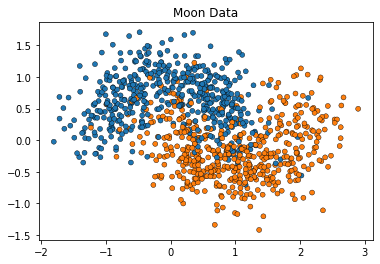

In [28]:
sns.scatterplot(
    x=X[:, 0], y=X[:, 1], hue=y, marker="o", s=25, edgecolor="k", legend=None
).set_title("Moon Data")
plt.show()

### Part (c) - Create 3 different data subsets by selecting 100 of the 1000 data points at random three times (with replacement)

In [77]:
import random
index_1 = np.random.choice(1000, 100)
index_2 = np.random.choice(1000, 100)
index_3 = np.random.choice(1000, 100)

x1 = X[index_1, :]
y1= y[index_1]

x2 = X[index_2, :]
y2= y[index_2]

x3 = X[index_3, :]
y3= y[index_3]


In [85]:
print(x1.shape) # make sure it's 2-dimensional
print(y1.shape) # make sure it's 1-dimensional
print(type(x1)) # make sure it's a numpy array
#print(subset1)
#print(subset1y)

(100, 2)
(100,)
<class 'numpy.ndarray'>


For each of these 100-sample datasets, fit three separate k-Nearest Neighbor classifiers with: $k = \{1, 25, 50\}$.

In [82]:
# Implement KNN using sklearn for subset 1
knn1_1 = KNeighborsClassifier(n_neighbors=1)
knn1_2 = KNeighborsClassifier(n_neighbors=25)
knn1_3 = KNeighborsClassifier(n_neighbors=50)

# Fit KNN
set1_1 = knn1_1.fit(x1, y1)
set1_2 = knn1_2.fit(x1, y1)
set1_3 = knn1_3.fit(x1, y1)

In [83]:
# Implement KNN using sklearn for subset 2
knn2_1 = KNeighborsClassifier(n_neighbors=1)
knn2_2 = KNeighborsClassifier(n_neighbors=25)
knn2_3 = KNeighborsClassifier(n_neighbors=50)

set2_1 = knn2_1.fit(x2, y2)
set2_2 = knn2_2.fit(x2, y2)
set2_3 = knn2_3.fit(x2, y2)

In [84]:
# Implement KNN using sklearn for subset 3
knn3_1 = KNeighborsClassifier(n_neighbors=1)
knn3_2 = KNeighborsClassifier(n_neighbors=25)
knn3_3 = KNeighborsClassifier(n_neighbors=50)

set3_1 = knn3_1.fit(x3, y3)
set3_2 = knn3_2.fit(x3, y3)
set3_3 = knn3_3.fit(x3, y3)

### Part (d) - For each combination of dataset and trained classifier plot the decision boundary.

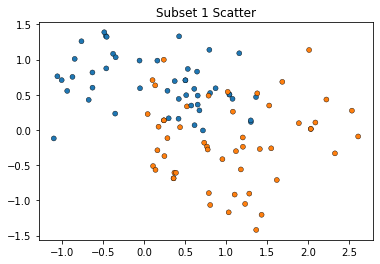

In [75]:
# look at subset 1 scatterplot
sns.scatterplot(
    x=x1[: , 0], y=x1[: , 1], hue=y1, marker="o", s=25, edgecolor="k", legend=False
).set_title("Subset 1 Scatter")
plt.show()

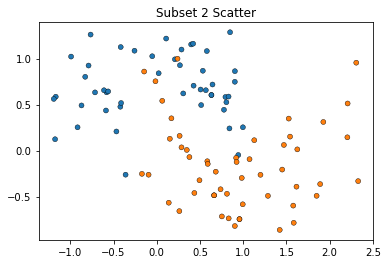

In [88]:
# look at subset 2 scatterplot
sns.scatterplot(
    x=x2[:, 0], y=x2[:, 1], hue=y2, marker="o", s=25, edgecolor="k", legend=False
).set_title("Subset 2 Scatter")
plt.show()

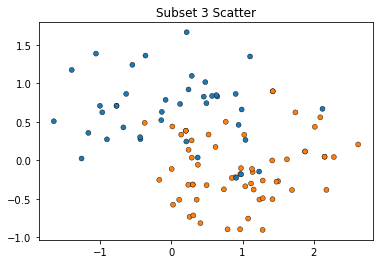

In [89]:
# look at subset 3 scatterplot
sns.scatterplot(
    x=x3[:, 0], y=x3[:, 1], hue=y3, marker="o", s=25, edgecolor="k", legend=False
).set_title("Subset 3 Scatter")
plt.show()

Plot subset 1 with three different KNN

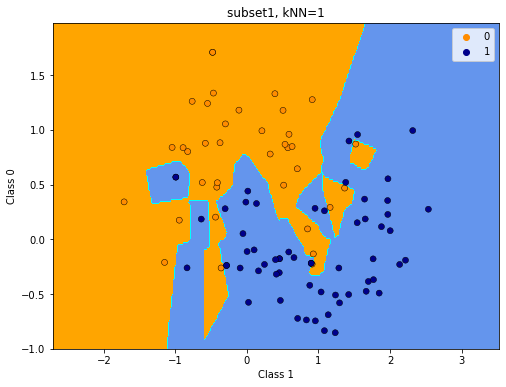

In [99]:
# nearest neighbour = 1
from matplotlib.colors import ListedColormap

h = 0.02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = (["darkorange", "darkblue"])

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = x1.min() - 1, x1.max() + 1
y_min, y_max = y1.min() - 1, y1.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn1_1.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
sns.scatterplot(
    x=x1[:, 0],
    y=x1[:, 1],
    hue=y1,
    palette=cmap_bold,
    alpha=1.0,
    edgecolor="black",
    )
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(
    "subset1, kNN=1"
)
plt.xlabel("Class 1")
plt.ylabel("Class 0")

plt.savefig('plot1_1.png', bbox_inches='tight')


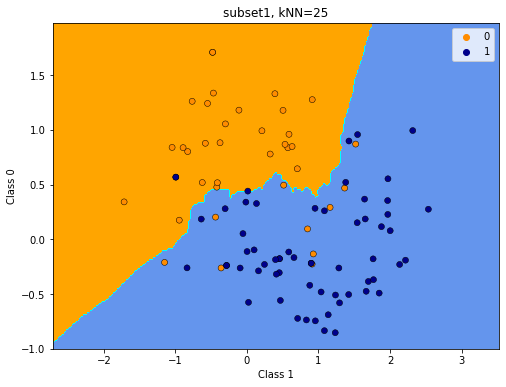

In [100]:
# nearest neighbour = 25

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = x1.min() - 1, x1.max() + 1
y_min, y_max = y1.min() - 1, y1.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn1_2.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
sns.scatterplot(
    x=x1[:, 0],
    y=x1[:, 1],
    hue=y1,
    palette=cmap_bold,
    alpha=1.0,
    edgecolor="black",
    )
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(
    "subset1, kNN=25"
)
plt.xlabel("Class 1")
plt.ylabel("Class 0")

plt.savefig('plot1_2.png', bbox_inches='tight')
    

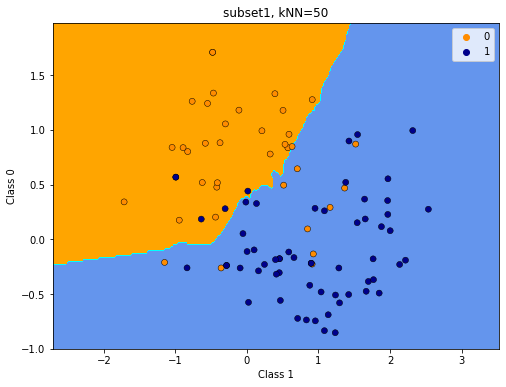

In [101]:
# nearest neighbour = 50

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = x1.min() - 1, x1.max() + 1
y_min, y_max = y1.min() - 1, y1.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn1_3.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
sns.scatterplot(
    x=x1[:, 0],
    y=x1[:, 1],
    hue=y1,
    palette=cmap_bold,
    alpha=1.0,
    edgecolor="black",
    )
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(
    "subset1, kNN=50"
)
plt.xlabel("Class 1")
plt.ylabel("Class 0")

plt.savefig('plot1_3.png', bbox_inches='tight')


Plot subset2 with three different KNN

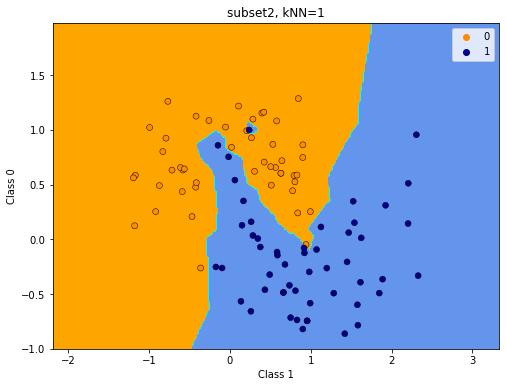

In [102]:
# nearest neighbour = 1

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = x2.min() - 1, x2.max() + 1
y_min, y_max = y2.min() - 1, y2.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn2_1.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
sns.scatterplot(
    x=x2[:, 0],
    y=x2[:, 1],
    hue=y2,
    palette=cmap_bold,
    alpha=1.0,
    edgecolor="black",
    )
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(
    "subset2, kNN=1"
)
plt.xlabel("Class 1")
plt.ylabel("Class 0")

plt.savefig('plot2_1.png', bbox_inches='tight')

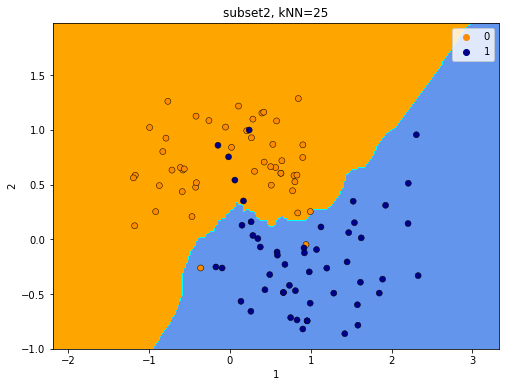

In [107]:
# nearest neighbour = 25

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = x2.min() - 1, x2.max() + 1
y_min, y_max = y2.min() - 1, y2.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn2_2.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
sns.scatterplot(
    x=x2[:, 0],
    y=x2[:, 1],
    hue=y2,
    palette=cmap_bold,
    alpha=1.0,
    edgecolor="black",
)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("subset2, kNN=25")
plt.xlabel("1")
plt.ylabel("2")

plt.savefig('plot2_2.png', bbox_inches='tight')


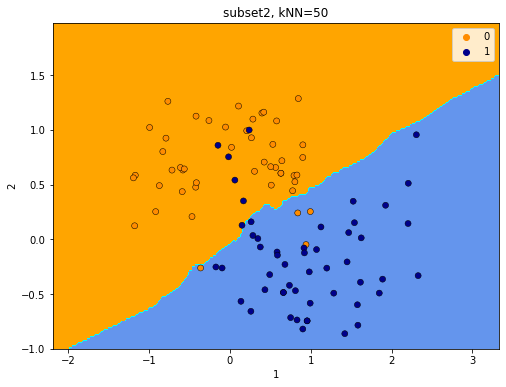

In [106]:
# nearest neighbour = 50

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = x2.min() - 1, x2.max() + 1
y_min, y_max = y2.min() - 1, y2.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn2_3.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
sns.scatterplot(
    x=x2[:, 0],
    y=x2[:, 1],
    hue=y2,
    palette=cmap_bold,
    alpha=1.0,
    edgecolor="black",
    )
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(
    "subset2, kNN=50"
)
plt.xlabel("1")
plt.ylabel("2")

plt.savefig('plot2_3.png', bbox_inches='tight')

Plot subset 3 with three different K settings

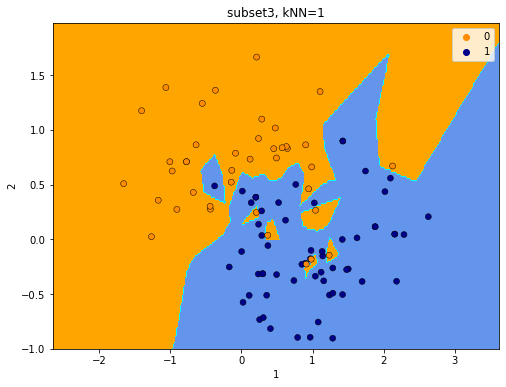

In [103]:
# nearest neighbour = 1

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = x3.min() - 1, x3.max() + 1
y_min, y_max = y3.min() - 1, y3.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn3_1.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
sns.scatterplot(
    x=x3[:, 0],
    y=x3[:, 1],
    hue=y3,
    palette=cmap_bold,
    alpha=1.0,
    edgecolor="black",
    )
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(
    "subset3, kNN=1"
)
plt.xlabel("1")
plt.ylabel("2")

plt.savefig('plot3_1.png', bbox_inches='tight')

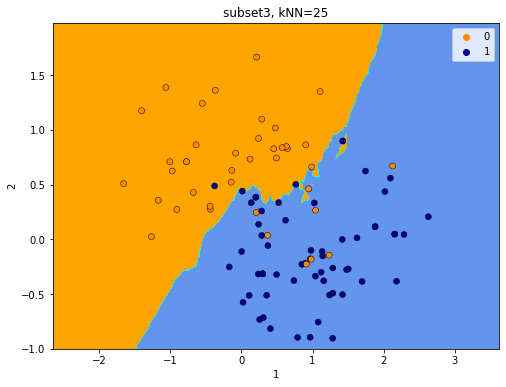

In [104]:
# nearest neighbour = 25

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = x3.min() - 1, x3.max() + 1
y_min, y_max = y3.min() - 1, y3.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn3_2.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
sns.scatterplot(
    x=x3[:, 0],
    y=x3[:, 1],
    hue=y3,
    palette=cmap_bold,
    alpha=1.0,
    edgecolor="black",
    )
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(
    "subset3, kNN=25"
)
plt.xlabel("1")
plt.ylabel("2")

plt.savefig('plot3_2.png', bbox_inches='tight')

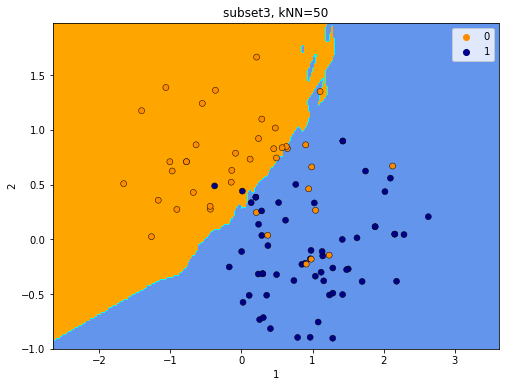

In [105]:
# nearest neighbour = 50

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = x3.min() - 1, x3.max() + 1
y_min, y_max = y3.min() - 1, y3.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn3_3.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
sns.scatterplot(
    x=x3[:, 0],
    y=x3[:, 1],
    hue=y3,
    palette=cmap_bold,
    alpha=1.0,
    edgecolor="black",
    )
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(
    "subset3, kNN=50"
)
plt.xlabel("1")
plt.ylabel("2")

plt.savefig('plot3_3.png', bbox_inches='tight')

In [113]:
import cv2

Image1 = cv2.imread('plot1_1.png')
Image2 = cv2.imread('plot1_2.png')
Image3 = cv2.imread('plot1_3.png')
Image4 = cv2.imread('plot2_1.png')
Image5 = cv2.imread('plot2_2.png')
Image6 = cv2.imread('plot2_3.png')
Image7 = cv2.imread('plot3_1.png')
Image8 = cv2.imread('plot3_2.png')
Image9 = cv2.imread('plot3_3.png')

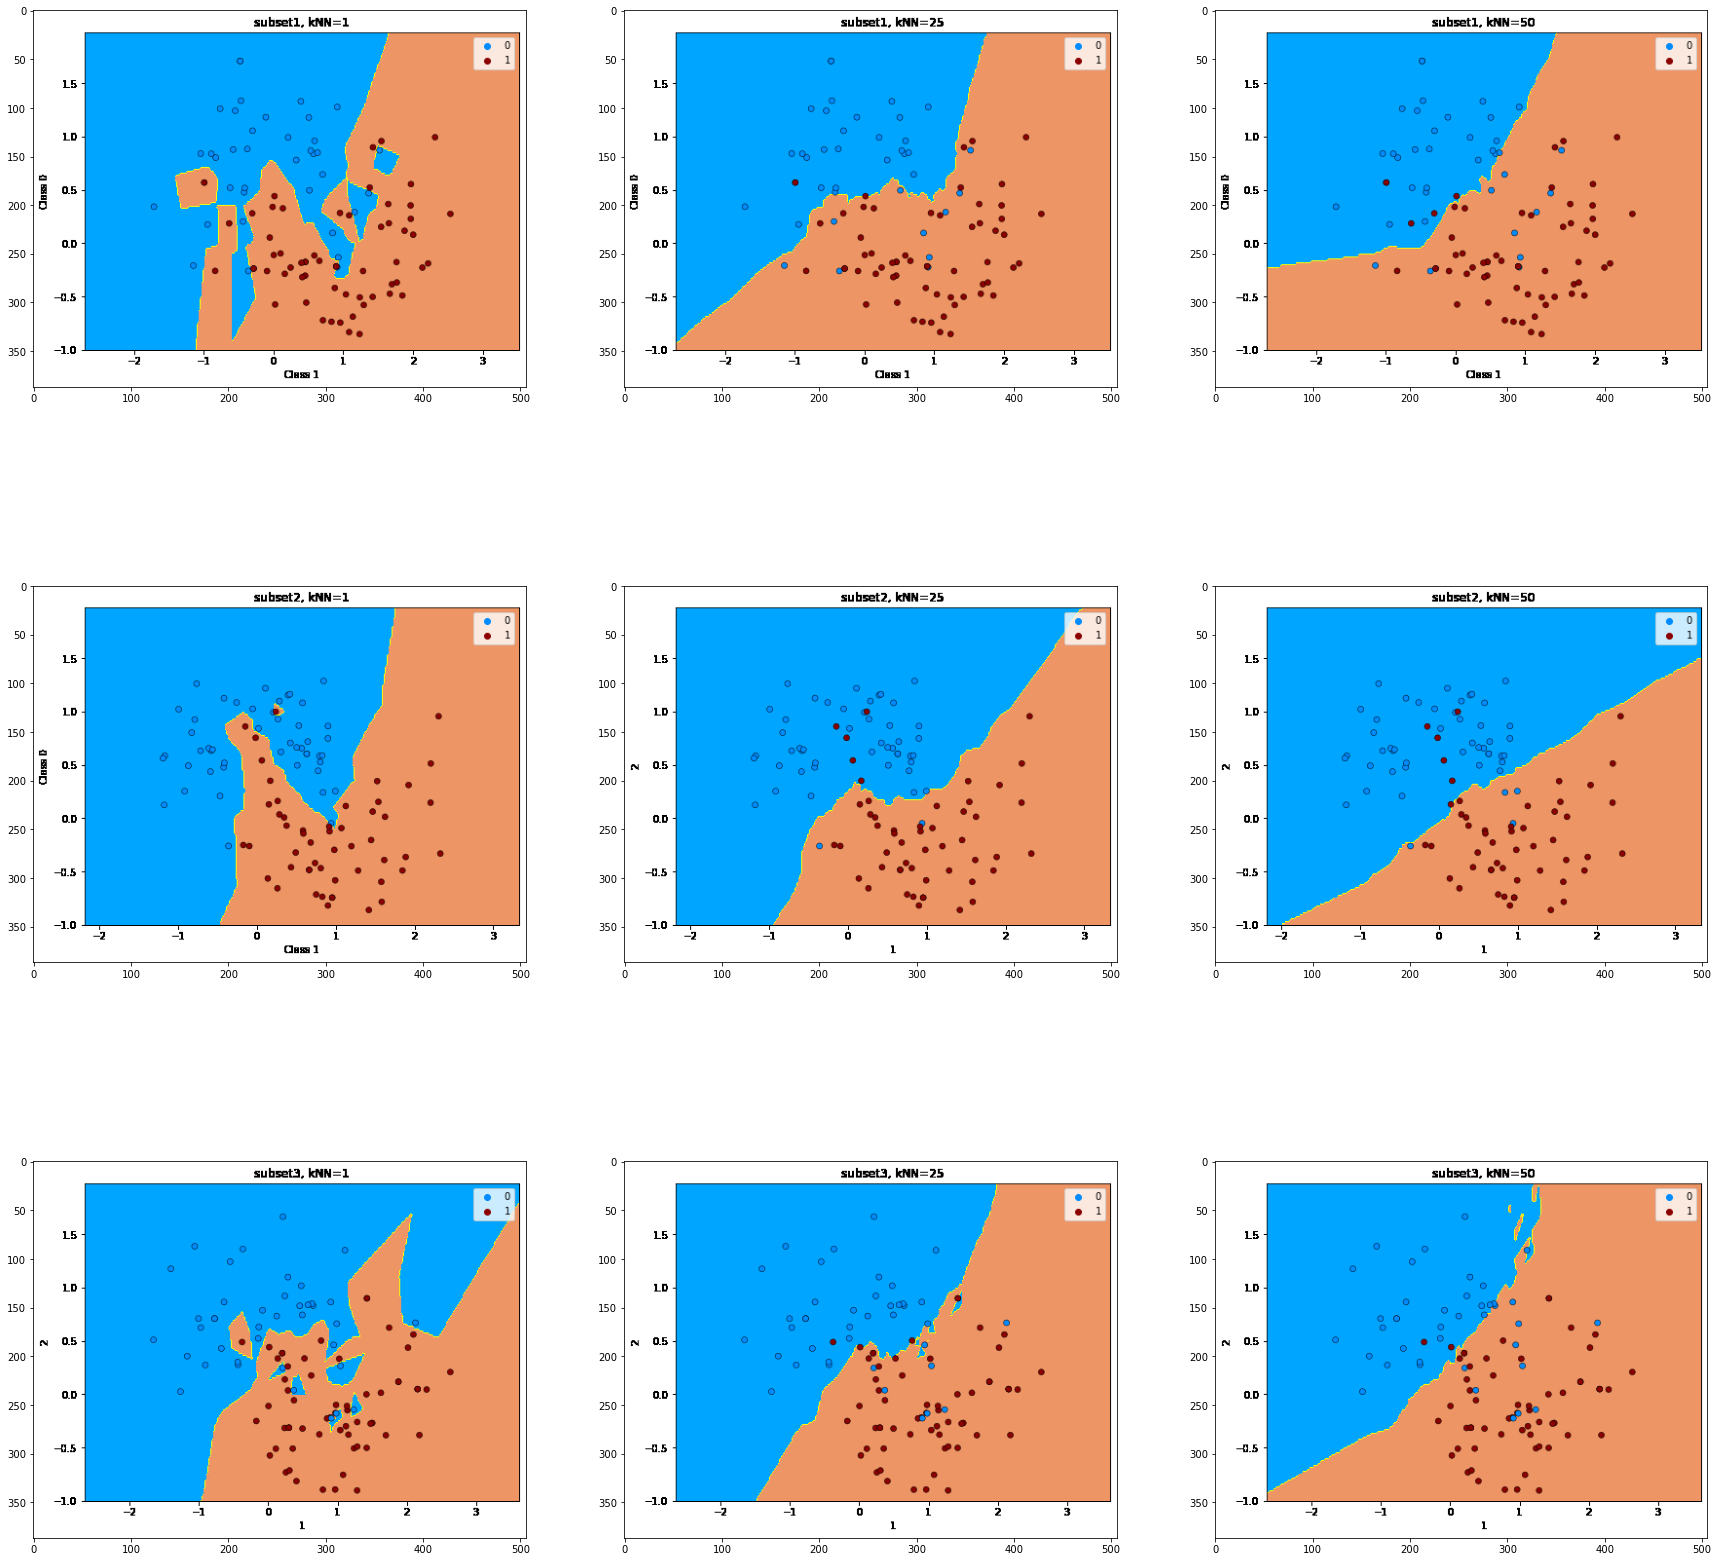

In [119]:
# Form a 3-by-3 grid 
# Each column should represent a different value of K (1, 25, 50) 
# and each row should represent a different dataset (subset 1, subset 2, subset 3)

f, axarr = plt.subplots(3,3, figsize=(30,30))

# top left:
axarr[0,0].imshow(Image1)

# top middle
axarr[0,1].imshow(Image2)

# top right:
axarr[0,2].imshow(Image3)

# middle left
axarr[1,0].imshow(Image4)

# middle middle
axarr[1,1].imshow(Image5)

# middle right
axarr[1,2].imshow(Image6)

# bottom left:
axarr[2,0].imshow(Image7)

# bottom middle
axarr[2,1].imshow(Image8)

# bottom right:
axarr[2,2].imshow(Image9)

### Part (e) - What do you notice about the difference between the rows and the columns. Which decision boundaries appear to best separate the two classes of data? Which decision boundaries vary the most as the data change?

Decision boundaries vary more for lower K than for higher K. For these 100-sample datasets, the intermediate K=25 seems to give the best separation of the two classes of data. The lowest K=1 does not separate the data well, with two many small "islands", while the highest K=50 seems to be to general, losing more of the data of one class in its boundaries (e.g. for subset 1 K = 25 only loses one datapoint of class1 but K = 50 loses four datapoints).

### Part (f) - Explain the bias-variance tradeoff using the example of the plots you made in this exercise and its implications for training supervised machine learning algorithms.

The more flexible an algorithm is, the less bias it has and the less bias an algorith has, the less likely it is to miss relevant relations between features (underfitting) in a supervised algorithm. The variance is dependent on the fluctuations in the training dataset and can lead to an agorithm learning to model noise (overfitting).

## Question 6
**[18 points] Bias-variance trade-off II: Quantifying the tradeoff**. This exercise explores the impact of the bias-variance tradeoff on classifier performance by looking at the performance on both training and test data.

Here, the value of $k$ determines how flexible our model is.

**(a)** Using the function created earlier to generate random samples (using the `make_moons` function setting the `noise` parameter to 0.35), create a new set of 1000 random samples, and call this dataset your test set and the previously created dataset your training set.

**(b)** Train a kNN classifier on your training set for $k = 1,2,...500$. Apply each of these trained classifiers to both your training dataset and your test dataset and plot the classification error (fraction of incorrect predictions).

**(c)** What trend do you see in the results?

**(d)** What values of $k$ represent high bias and which represent high variance?

**(e)** What is the optimal value of $k$ and why?

**(f)** In KNN classifiers, the value of k controls the flexibility of the model - what controls the flexibility of other models?

**ANSWER 6**

### Part (a) - Using the function created earlier to generate random samples, create a new set of 1000 random samples, and call this dataset your test set and the previously created dataset your training set.

In [ ]:
train_set = sklearn.datasets.make_moons(
    n_samples=1000, shuffle=True, noise=0.35, random_state=None
)
test_set = random.choices(X, weights=None, cum_weights=None, k=1000)


### Part (b) - Train a kNN classifier on your training set for $k = 1,2,...500$.

In [ ]:
# Apply each of these trained classifiers to both your training dataset and your test dataset and plot the classification error (fraction of incorrect predictions).
import scikitplot as skplt
import sklearn.metrics as skm

classifiers = [
    KNeighborsClassifier(),
    ] 
n_neighbors = [range(1, 501)]  # list from 1 to 500
class_iter = iter(classifiers)
clf = next(class_iter)
while True:
    try:
        if isinstance(clf, KNeighborsClassifier) and any(n_neighbors):
            neighbor_val = n_neighbors.pop()
            clf.set_params(n_neighbors=neighbor_val)
        else:
            clf = next(class_iter)
        print("here1")

        #rest of code here

        clf.fit(train_set)
        name = clf.__class__.__name__
            
        expectation = test_set
        train_prediction = clf.predict(train_set)
        acc = skm.accuracy_score(expectation, train_prediction)   
        pre = skm.precision_score(expectation, train_prediction)
        rec = skm.recall_score(expectation, train_prediction)
        f1 = skm.f1_score(expectation, train_prediction)


        fig, ax = plt.subplots(1,2, figsize=(14,4))
        plt.suptitle(f'{name} \n', fontsize = 18)
        plt.subplots_adjust(top = 0.8)
        skplt.metrics.plot_confusion_matrix(expectation, train_prediction, ax=ax[0])
        skplt.metrics.plot_confusion_matrix(expectation, train_prediction, normalize=True, ax = ax[1])
        plt.show()
        
        print(f"for the {name} we receive the following values:")
        print("Accuracy: {:.3%}".format(acc))
        print('Precision score: {:.3%}'.format(pre))
        print('Recall score: {:.3%}'.format(rec))
        print('F1 score: {:.3%}'.format(f1))

    except StopIteration:
        break


here1


TypeError: fit() missing 1 required positional argument: 'y'

### Part(c) - What trend do you see in the results?

### Part (d) - What values of $k$ represent high bias and which represent high variance?

### Part (f) - What is the optimal value of $k$ and why?

### Part (e) - In KNN classifiers, the value of k controls the flexibility of the model - what controls the flexibility of other models?

## Question 7
**[18 points] Linear regression and nonlinear transformations**. Linear regression can be used to model nonlinear relationships when feature variables are properly transformed to represent the nonlinearities in the data. In this exercise, you're given training and test data contained in files "A2_Q7_train.csv" and "A2_Q7_test.csv" in the "data" folder for this assignment. Your goal is to develop a regression algorithm from the training data that performs well on the test data.

*Hint: Use the scikit learn [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) module.*

**(a)** Create a scatter plot of your training data.

**(b)** Estimate a linear regression model ($y = a_0 + a_1 x$) for the training data and calculate both the $R^2$ value and mean square error for the fit of that model for the training data. Also provide the equation representing the estimated model (e.g. $y = a_0 + a_1 x$, but with the estimated coefficients inserted. Consider this your baseline model against which you will compare other model options. *Evaluating performance on the training data is not a measure of how well this model would generalize to unseen data. We will evaluate performance on the test data once we see our models fit the training data decently well.*  

**(c)** If features can be nonlinearly transformed, a linear model may incorporate those non-linear feature transformation relationships in the training process. From looking at the scatter plot of the training data, choose a transformation of the predictor variable, $x$ that may make sense for these data. This will be a multiple regression model of the form $y = a_0 + a_1 z_1 + a_2 z_2 + \ldots + a_n z_n$. Here $z_i$ could be any transformations of x - perhaps it's $\frac{1}{x}$, $log(x)$, $sin(x)$, $x^k$ (where $k$ is any power of your choosing). Provide the estimated equation for this multiple regression model (e.g. if you chose your predictors to be $z_1 = x$ and $z_2 = log(x)$, your model would be of the form $y = a_0 + a_1 x + a_2 log(x)$. Also provide the $R^2$ and mean square error of the fit for the training data.

**(d)** Visualize the model fit to the training data. Using both of the models you created in parts (b) and (c), plot the original data (as a scatter plot) AND the curves representing your models (each as a separate curve) from (b) and (c).

**(e)** Now its time to compare your models and evaluate the generalization performance on held out test data. Using the models above from (b) an (c), apply them to the test data and estimate the $R^2$ and mean square error of the test dataset.

**(f)** Which models perform better on the training data, and which on the test data? Why?

**(g)** Imagine that the test data were significantly different from the training dataset. How might this affect the predictive capability of your model? How would the accuracy of generalization performance be impacted? Why?

*To help get you started - here's some code to help you load in the data for this exercise (you'll just need to update the path)*:

**ANSWER 7**

### Part (a) - Create a scatterplot of the training data

In [ ]:
import numpy as np
import pandas as pd

path = './data/'
train = pd.read_csv(path + 'A2_Q7_train.csv')
test = pd.read_csv(path + 'A2_Q7_test.csv')

x_train = train.x.values
y_train = train.y.values

x_test = test.x.values
y_test = test.y.values

In [ ]:
# Look at data
print(type(x_train))
print(type(x_test))
print(type(y_train))
print(type(y_test))

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
x_train1 = np.reshape(x_train, (-1, 1))
x_test1 = np.reshape(x_test, (-1, 1))
y_train1 = np.reshape(y_train, (-1, 1))
y_test1 = np.reshape(y_test, (-1, 1))
print(x_train1.shape)

(50, 1)


In [ ]:
print(x_train1)

In [ ]:
print(x_test1)

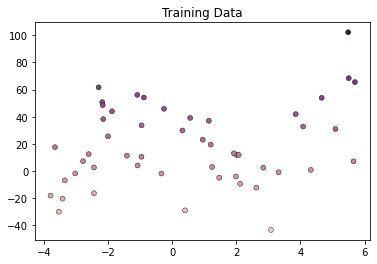

In [ ]:
sns.scatterplot(
    x=x_train, y=y_train, hue=y_train, marker="o", s=25, edgecolor="k", legend=False
).set_title("Training Data")
plt.show()

### Part (b) - Estimate a linear regression model ($y = a_0 + a_1 x$) for the training data and calculate both the $R^2$ value and mean square error for the fit of that model for the training data.

Coefficients: 
 [[2.59072826]]
Mean squared error: 342.38
Coefficient of determination: -40.86


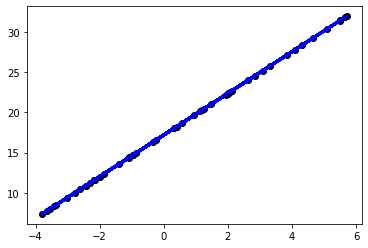

In [ ]:
# Simple linear model (“ordinary least squares”) for the training data
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import mean_squared_error, r2_score

reg = LinearRegression().fit(x_train1, y_train1)
#print("here1")
#print(reg.score(x_train1, y_train1))

#print(reg.coef_)

#print(reg.intercept_)

train_pred = reg.predict(np.array(x_train1))

# The coefficients
print("Coefficients: \n", reg.coef_)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(x_train1, train_pred))

# The coefficient of determination: 
print("Coefficient of determination: %.2f" % r2_score(x_train1, train_pred)) #1 is perfect prediction

# Plot outputs
plt.scatter(x_train1, train_pred, color="black")
plt.plot(x_train1, train_pred, color="blue", linewidth=3)

The estimated model is represented by the equation: $y = a_0 + 2.59 x$.

### Part (c) - If features can be nonlinearly transformed, a linear model may incorporate those non-linear feature transformation relationships in the training process. From looking at the scatter plot of the training data, choose a transformation of the predictor variable, $x$ that may make sense for these data.

Squaring my x values as a transformation should be a good solution for this data with a polynomial distribution.

# This will be a multiple regression model of the form $y = a_0 + a_1 z_1 + a_2 z_2 + \ldots + a_n z_n$. 
# Here $z_i$ could be any transformations of x - perhaps it's $\frac{1}{x}$, $log(x)$, $sin(x)$, $x^k$ (where $k$ is any power of your choosing). 
# Provide the estimated equation for this multiple regression model (e.g. if you chose your predictors to be $z_1 = x$ and $z_2 = log(x)$, your model would be of the form $y = a_0 + a_1 x + a_2 log(x)$. 
# Also provide the $R^2$ and mean square error of the fit for the training data.


### Part (d) - Visualize the model fit to the training data. Using both of the models you created in parts (b) and (c), plot the original data (as a scatter plot) AND the curves representing your models (each as a separate curve) from (b) and (c)

### Part (e) - Compare your models and evaluate the generalization performance on held out test data. Using the models above from (b) an (c), apply them to the test data and estimate the $R^2$ and mean square error of the test dataset.

### Part (f) - Which models perform better on the training data, and which on the test data? Why?

### Part (g) - Imagine that the test data were significantly different from the training dataset. How might this affect the predictive capability of your model? How would the accuracy of generalization performance be impacted? Why?